# Part A: Read and visualize the data

Read the data, import the necessary libraries

In [1]:
import numpy as np
import pandas as pd

Import the data files

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

Look at the first few rows, the train had 12 columns, the test has 11 columns

In [3]:
train.head()
test.head()
train.tail()
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


Find the size and type of data sets

In [9]:
print(train.shape)
print(test.shape)
type(test)
type(train)
#print(train.dtypes)
#print(test.dtypes)

(891, 12)
(418, 11)


pandas.core.frame.DataFrame

Column titles

In [10]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Number of columns for both datasets

In [11]:
col1=len(train.columns)
col1

12

In [12]:
col2=len(test.columns)
col2

11

New libraries for plotting

In [13]:
import seaborn as sns
#%matplotlib notebook
import matplotlib.pyplot as plt

/usr/lib/python3/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Plot different features to visually inspect them. Plot training and nominal data first.

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


<IPython.core.display.Javascript object>


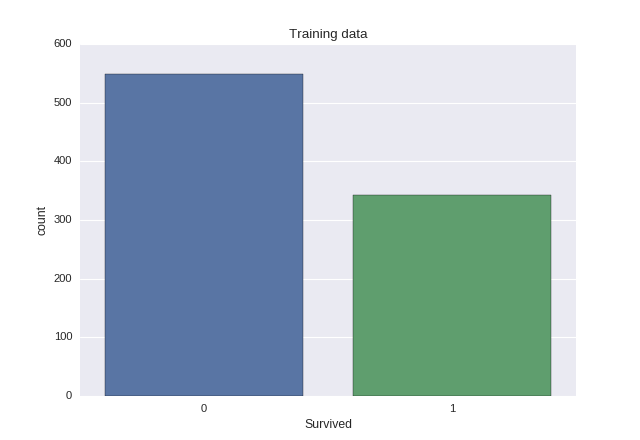

In [14]:
%matplotlib notebook
sns.countplot(x="Survived",data=train)
plt.title('Training data')

For quantitative data, try histograms.

<IPython.core.display.Javascript object>


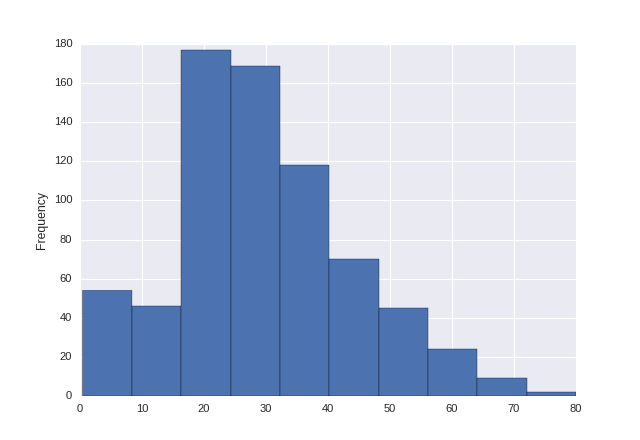

In [15]:
train['Age'].plot.hist()

Histogram with specific bin and size of plot

<IPython.core.display.Javascript object>


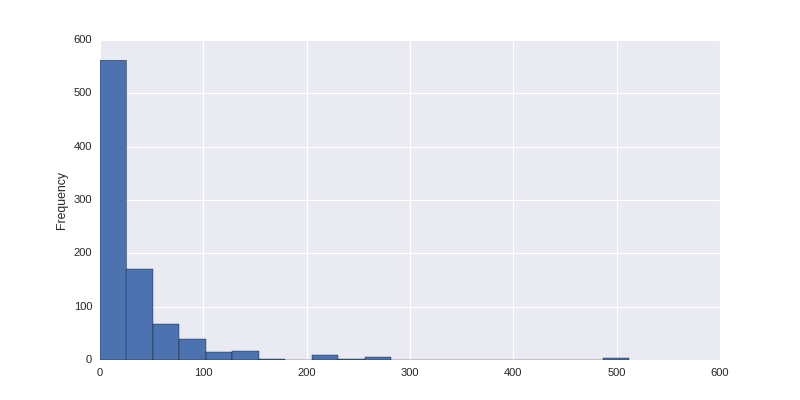

In [17]:
train['Fare'].plot.hist(bins = 20, figsize = (10,5))

See the correlation between 2 values with boxplot

<IPython.core.display.Javascript object>


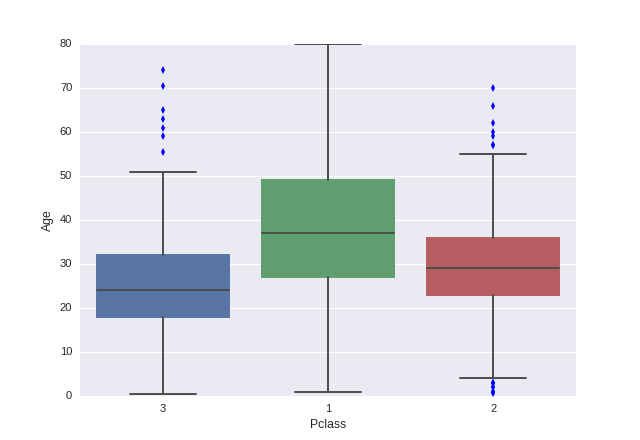

In [18]:
sns.boxplot(x = 'Pclass', y = 'Age', data = train)

# Part B. Feature engineering and missing values

Check for missing values

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [20]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are 177 values missing in Age, 687 missing in Cabin and 2 values missing in Embarked for the train data. Visualizing the missing data.

<IPython.core.display.Javascript object>


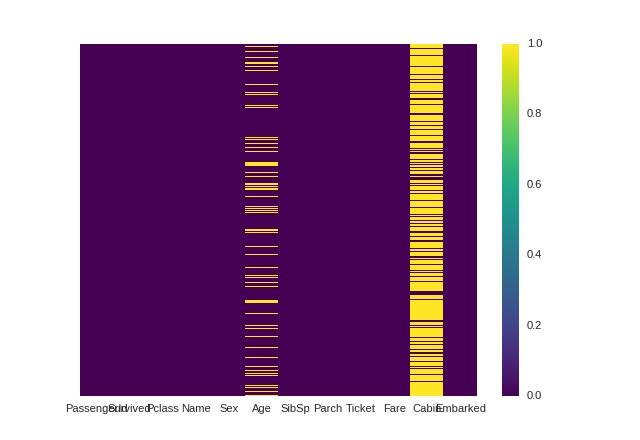

In [21]:
sns.heatmap(train.isnull(), yticklabels=False, cmap = 'viridis')

Plot the 'Embarked' column which is also a nominal feature

<IPython.core.display.Javascript object>


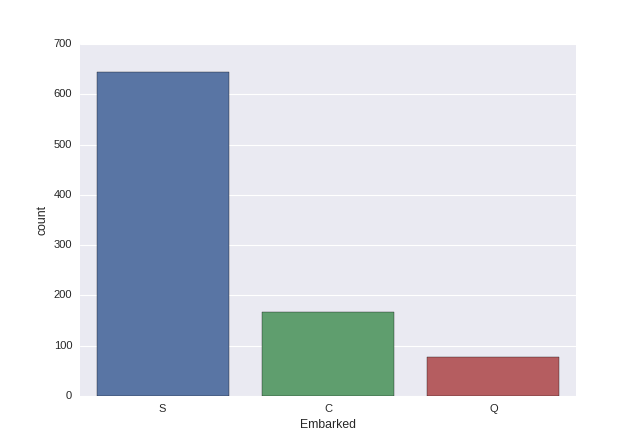

In [22]:
sns.countplot(x="Embarked", data=train)

We see there are three categories:S,C,Q which denote Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton).Is there a correlation between the embarkation port and survival?

<IPython.core.display.Javascript object>


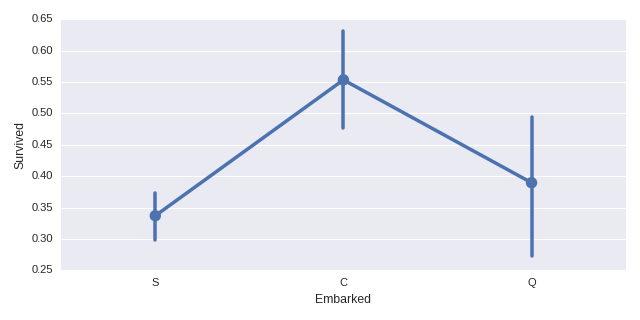

In [23]:
sns.factorplot('Embarked','Survived', data=train, size=4, aspect=2)

Check the test data for missing values

In [24]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

There are 86 values missing in Age, 327 missing in Cabin and 1 value missing in Fare for the test data.

Print all the columns names

In [25]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [26]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Train data have an additional column compared to the test data ('Survived')

We will drop the following for now: 'PassengerId', 'Name' (although it can be used to determine the gender if we did not have that info),'Ticket','Cabin'(it could be used to determine the Pclass info but we have that information).

'Age' and 'Cabin' have missing data in both train and test data.

About the missing values you have 3 options: 
a.drop the passengers that have NaN
b.drop the particular column 
c.replace the missing values with a reasonable number

We will drop 'Cabin' but we have to replace 'Age' and 'Fare' in train and test data.

Age distribution

<IPython.core.display.Javascript object>


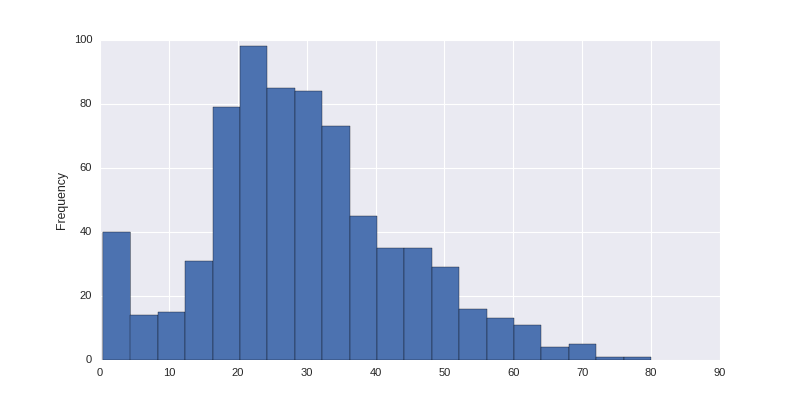

In [27]:
train['Age'].plot.hist(bins = 20, figsize = (10,5))

Get the average, standard deviation and number of NaN values in training data

In [28]:
avg_age_train = train["Age"].mean()
std_age_train = train["Age"].std()
count_nan_age_train = train["Age"].isnull().sum()
print("average age in training data:",avg_age_train)
print("st.deviation of age in training data:",std_age_train)
print("how many missing training data in age:",count_nan_age_train)

average age in training data: 29.69911764705882
st.deviation of age in training data: 14.526497332334042
how many missing training data in age: 177


Get the average, standard deviation and number of NaN values in test data

In [31]:
avg_age_test = test["Age"].mean()
std_age_test = test["Age"].std()
count_nan_age_test = test["Age"].isnull().sum()
print("average age in test data:",avg_age_test)
print("st.deviation of age in test data:",std_age_test)
print("how many missing test data in age:",count_nan_age_test)

average age in test data: 30.272590361445783
st.deviation of age in test data: 14.181209235624422
how many missing test data in age: 86


There are different ways to fill the missing numbers. 
One way is to interpolate the values of age (train['Age'] = train['Age'].interpolate())or take the median.
The previous might bias the sample, take random values between (mean - std) and (mean + std) instead

In [32]:
rand_train = np.random.randint(avg_age_train - std_age_train, avg_age_train + std_age_train, size = count_nan_age_train)
rand_test  = np.random.randint(avg_age_test -  std_age_test,  avg_age_test  + std_age_test,  size = count_nan_age_test)

Look at the age distribution before and after the data replacement.

NOTE:drop all null values first and then convert to integer

<IPython.core.display.Javascript object>


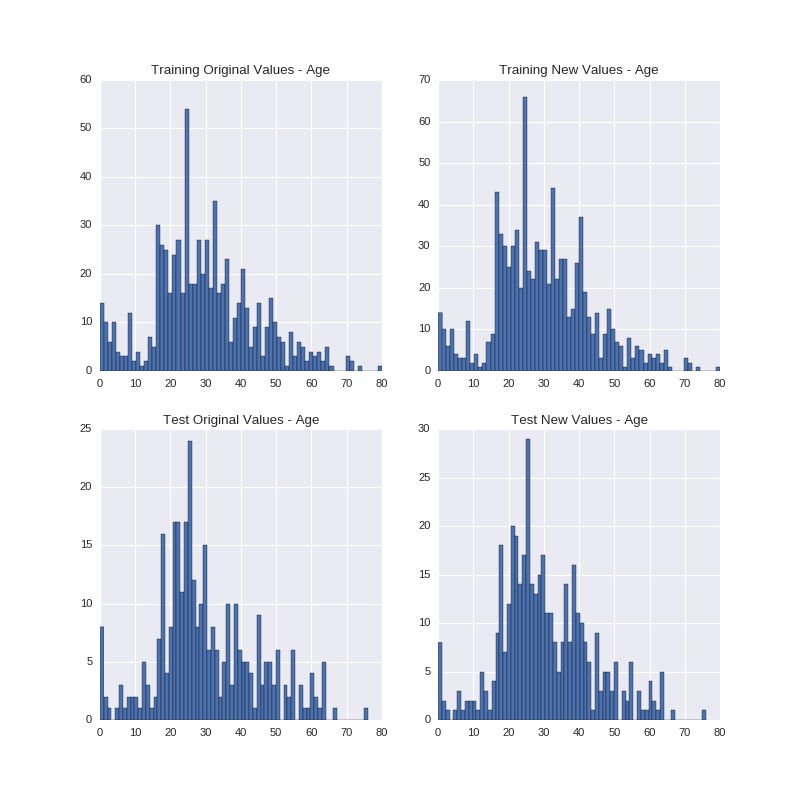

In [33]:
fig, ((axis1,axis2),(axis3,axis4)) = plt.subplots(2,2,figsize=(10,10))
axis1.set_title('Training Original Values - Age')
axis2.set_title('Training New Values - Age')
axis3.set_title('Test Original Values - Age')
axis4.set_title('Test New Values - Age')
train['Age'].dropna().astype(int).hist(bins=70, ax=axis1)
test['Age'].dropna().astype(int).hist(bins=70, ax=axis3)
train.loc[np.isnan(train["Age"]), 'Age'] = rand_train
test.loc[np.isnan(test["Age"]), 'Age'] = rand_test
train['Age'].astype(int).hist(bins=70, ax=axis2)
test['Age'].astype(int).hist(bins=70, ax=axis4)

Now that the replacements are done, check the new age data
peaks for survived/not survived passengers by their age

<IPython.core.display.Javascript object>


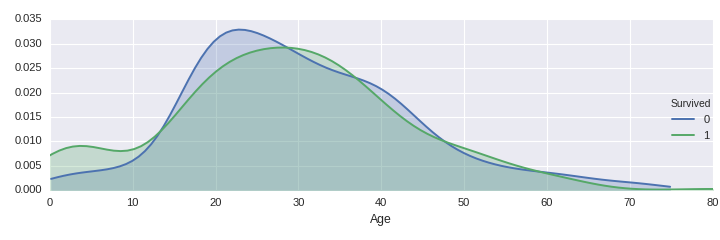

In [34]:
facet = sns.FacetGrid(train, hue="Survived",aspect=3)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.show()

There are only 2 values that have to be replaced for the 'Embark' in the training data. Replace them with the most common value which is 'S'

In [35]:
train["Embarked"] = train["Embarked"].fillna("S")
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


Create a new feature based on information from different columns.

'Sibsp' defines it the person is a sibling or a spouse while 'Parch' defines if they are a parent, a child or traveling alone. We want to create a quantitative value that shows whether they were traveling alone or not and if their chances of survival is influenced by the size of thei family they were traveling with. Add Sibsp+Parch and create a new column 'Family' for both train and test that shows the size of their family.

In [36]:
train['Family'] =  train["Parch"] + train["SibSp"] 
test['Family'] =   test["Parch"]  + test["SibSp"] 

Create a new column to see whether if someone is alone changes his survival chances.

Replace with one for family values >0 and 0 for zero.

first create the 'alone' columns 

In [37]:
train[10:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7000,G6,S,2
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.5500,C103,S,0
12,13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,NaN,S,0
13,14,0,3,"Andersson, Mr. Anders Johan",male,39,1,5,347082,31.2750,NaN,S,6
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14,0,0,350406,7.8542,NaN,S,0
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55,0,0,248706,16.0000,NaN,S,0
16,17,0,3,"Rice, Master. Eugene",male,2,4,1,382652,29.1250,NaN,Q,5
17,18,1,2,"Williams, Mr. Charles Eugene",male,37,0,0,244373,13.0000,NaN,S,0
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31,1,0,345763,18.0000,NaN,S,1
19,20,1,3,"Masselmani, Mrs. Fatima",female,36,0,0,2649,7.2250,NaN,C,0


In [38]:
train['Alone'] =  train["Parch"] + train["SibSp"] 
test['Alone'] =   test["Parch"]  + test["SibSp"] 
train[10:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Alone
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7000,G6,S,2,2
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.5500,C103,S,0,0
12,13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,NaN,S,0,0
13,14,0,3,"Andersson, Mr. Anders Johan",male,39,1,5,347082,31.2750,NaN,S,6,6
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14,0,0,350406,7.8542,NaN,S,0,0
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55,0,0,248706,16.0000,NaN,S,0,0
16,17,0,3,"Rice, Master. Eugene",male,2,4,1,382652,29.1250,NaN,Q,5,5
17,18,1,2,"Williams, Mr. Charles Eugene",male,37,0,0,244373,13.0000,NaN,S,0,0
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31,1,0,345763,18.0000,NaN,S,1,1
19,20,1,3,"Masselmani, Mrs. Fatima",female,36,0,0,2649,7.2250,NaN,C,0,0


In [39]:
#We only want to change anything >0 to be equal to 1 and leave 0 as is.
train.loc[train['Alone'] > 0, 'Alone'] = 1
train[10:20]



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Alone
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7000,G6,S,2,1
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.5500,C103,S,0,0
12,13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,NaN,S,0,0
13,14,0,3,"Andersson, Mr. Anders Johan",male,39,1,5,347082,31.2750,NaN,S,6,1
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14,0,0,350406,7.8542,NaN,S,0,0
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55,0,0,248706,16.0000,NaN,S,0,0
16,17,0,3,"Rice, Master. Eugene",male,2,4,1,382652,29.1250,NaN,Q,5,1
17,18,1,2,"Williams, Mr. Charles Eugene",male,37,0,0,244373,13.0000,NaN,S,0,0
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31,1,0,345763,18.0000,NaN,S,1,1
19,20,1,3,"Masselmani, Mrs. Fatima",female,36,0,0,2649,7.2250,NaN,C,0,0


Every feature has a numberical value except the gender column.
You can set Male=0 and Female=1 to replace in the columns we already have.
Create a new array with 2 columns, one for each gender.    

In [40]:
dummy_train=pd.get_dummies(train['Sex'])
dummy_test=pd.get_dummies(test['Sex'])

Attach to the larger array

In [41]:
train = pd.concat([train,dummy_train],axis=1)
test  = pd.concat([test,dummy_test],axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Alone,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1,1,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,0,0,0,1


The 'Embarked' feature is nominal, we can change it so that we have now 3 columns separate for each embarkation port.

In [42]:
dummy_train2=pd.get_dummies(train['Embarked'])
dummy_test2 =pd.get_dummies(test['Embarked'])
#connect to the larger array
train = pd.concat([train,dummy_train2],axis=1)
test  = pd.concat([test,dummy_test2],axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Alone,female,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1,1,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1,1,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1,1,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,0,0,0,1,0,0,1


Also the test data are missing 'Fare' for one passenger

The passenger with the missing fare:

In [43]:
test[152:153]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Alone,female,male,C,Q,S
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0,0,0,1,0,0,1


There is no information that we can use to estimate the fare (cabin is missing) so I fill it with a median value.

In [44]:
test['Fare'].fillna(test['Fare'].median(),inplace=True)

In [45]:
test[152:153]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Alone,female,male,C,Q,S
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,14.4542,NaN,S,0,0,0,1,0,0,1


Look at all the columns to see if the ones missing information are filled

In [46]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 18 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Family         418 non-null int64
Alone          418 non-null int64
female         418 non-null float64
male           418 non-null float64
C              418 non-null float64
Q              418 non-null float64
S              418 non-null float64
dtypes: float64(7), int64(6), object(5)
memory usage: 62.0+ KB


In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 19 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
Family         891 non-null int64
Alone          891 non-null int64
female         891 non-null float64
male           891 non-null float64
C              891 non-null float64
Q              891 non-null float64
S              891 non-null float64
dtypes: float64(7), int64(7), object(5)
memory usage: 139.2+ KB


All columns (except 'Cabin' that we will not going to use) seem to have same amount of values.

Now we have to remove the columns that we are not going to use or are redundant:

1. 'PassengerId' is not needed
2. 'Name' is not needed
3. 'Sex' is replaced by 'female' and 'male'
4. 'SibSp' and 'Parch' were replaced by 'Family' and 'Alone'
5. 'Ticket' and 'Cabin' are not needed

Now all data are numeric so we can start the training

In [48]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Alone,female,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1,1,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1,1,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1,1,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,0,0,0,1,0,0,1


# C. Build different models

Define the training and testing datasets

For the X training data drop PassengerId,Name,Sex,SibSp,Parch,Ticket,Cabin,Survived

In [49]:
drop_features_train = ["PassengerId", "Name", "Sex", "SibSp", "Parch", "Ticket", "Cabin", "Survived","Embarked"]
X_train=train.drop(drop_features_train,axis=1)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 10 columns):
Pclass    891 non-null int64
Age       891 non-null float64
Fare      891 non-null float64
Family    891 non-null int64
Alone     891 non-null int64
female    891 non-null float64
male      891 non-null float64
C         891 non-null float64
Q         891 non-null float64
S         891 non-null float64
dtypes: float64(7), int64(3)
memory usage: 76.6 KB


In [50]:
Y_train=train["Survived"]
Y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [51]:
drop_features_test = ["PassengerId", "Name", "Sex", "SibSp", "Parch", "Ticket", "Cabin","Embarked"]
X_test  = test.drop(drop_features_test,axis=1).copy()

Now we will try different methods to test the predictions

# C.1. Models using all the training data

## C.1.1 Logistic regression

In [53]:
# import the libraries
from sklearn.linear_model import LogisticRegression

In [54]:
LR=LogisticRegression()

Fitting

In [56]:
LR.fit(X_train, Y_train)

Accuracy of the training data

In [57]:
acc = LR.score(X_train, Y_train)
'the accuracy is:',acc

('the accuracy is:', 0.8013468013468014)

Prediction for the test data

In [58]:
Y_pred=LR.predict(X_test)

In [59]:
#coefficients for each feature
LR.coef_

array([[-0.91191261, -0.02972824,  0.00260447, -0.37001171,  0.71035088,
         2.05886152, -0.52583824,  0.62613121,  0.60322613,  0.30366594]])

In [60]:
X_train.columns

Index(['Pclass', 'Age', 'Fare', 'Family', 'Alone', 'female', 'male', 'C', 'Q',
       'S'],
      dtype='object')

In [61]:
# Get Correlation Coefficient for each feature using Logistic Regression
coeff_lr = pd.DataFrame(X_train.columns)
coeff_lr.columns = ['Features']
coeff_lr["Coefficient Estimate"] = pd.Series(LR.coef_[0])

# preview
coeff_lr

,Features,Coefficient Estimate
0,Pclass,-0.911913
1,Age,-0.029728
2,Fare,0.002604
3,Family,-0.370012
4,Alone,0.710351
5,female,2.058862
6,male,-0.525838
7,C,0.626131
8,Q,0.603226
9,S,0.303666


## C.1.2. Support Vector Machine (SVM) and linear Support Vector Machine

In [62]:
# import libraries
from sklearn.svm import SVC, LinearSVC

In [64]:
svc = SVC()
svc.fit(X_train, Y_train)
acc_svc = svc.score(X_train, Y_train)
acc_svc

0.8956228956228957

In [65]:
#predict values
Y_pred2 = svc.predict(X_test)

In [67]:
#linear SVM
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
acc_linear_svc = linear_svc.score(X_train, Y_train)
acc_linear_svc

0.7194163860830527

In [68]:
#prediction
Y_pred = linear_svc.predict(X_test)

## C.1.3.Decision Tree Classifier

In [69]:
#import libraries
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)   
acc_decision_tree = decision_tree.score(X_train, Y_train)
acc_decision_tree

0.9831649831649831

In [70]:
#prediction
Y_pred = decision_tree.predict(X_test) 

## C.1.4. Random forest

In [71]:
# import libraries
from sklearn.ensemble import RandomForestClassifier

In [72]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
acc_rf = random_forest.score(X_train, Y_train)
acc_rf

0.9831649831649831

In [73]:
#predict values
Y_pred3 = random_forest.predict(X_test)

## C.1.5 Stochastic Gradient Descent

In [81]:
#import the appropriate libraries
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier

sgd = linear_model.SGDClassifier(max_iter=4, tol=None)
sgd.fit(X_train, Y_train)

In [82]:
acc_sgd=sgd.score(X_train, Y_train)
acc_sgd

0.7059483726150393

In [83]:
#predict values
Y_pred4 = sgd.predict(X_test)

## C.1.6 k-nearest neighbor

In [85]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
acc_knn = knn.score(X_train, Y_train)
acc_knn

0.8361391694725028

In [86]:
#predict values
Y_pred = knn.predict(X_test)

## C.1.7 Gaussian Naive Bayes

In [87]:
#import libaries
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
acc_gaussian = gaussian.score(X_train, Y_train)
acc_gaussian

0.792368125701459

In [88]:
#make prediction
Y_pred = gaussian.predict(X_test)  

## C.1.8 Perceptron

In [90]:
#import libaries
from sklearn.linear_model import Perceptron
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)
acc_perceptron = perceptron.score(X_train, Y_train) 
acc_perceptron

In [91]:
#make prediction
Y_pred = perceptron.predict(X_test)

### Best model

In [92]:
results = pd.DataFrame({
    'Model': ['Linear Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree','Support Vector Machines'],
    'Score': [acc_linear_svc, acc_knn, acc, 
              acc_rf, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree,acc_svc]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(10)

,Model
Score,
0.983165,Random Forest
0.983165,Decision Tree
0.895623,Support Vector Machines
0.836139,KNN
0.801347,Logistic Regression
0.792368,Naive Bayes
0.719416,Linear Support Vector Machines
0.714927,Perceptron
0.705948,Stochastic Gradient Decent


There is the potential of overfitting because we do not have the results from the test to compare. Splitting the training data will allow us to test the accuracy of a test dataset.

# C.2. Models with using split training data

We do not have the predictions for the test data, so the only way to test if our models give good results is to split the training data into two groups. Call the one group sp_train, this is the group we will use to train and the other group sp_test. This will allow us to create a confusion matrix as well.

In [93]:
# import libraries to split the data
from sklearn.model_selection import train_test_split

We will use 80% from our training data to train the model and use the other 20% for testing. We will use the same columns as we have used before. The test_size dictates the proportion of the test data. The train_test_split() randomizes the observations before extracting a percentage so for reproducibility we set a random seed (random_state=0).

In [94]:
sp_train_X, sp_test_X, sp_train_Y, sp_test_Y = train_test_split(
    X_train, Y_train, test_size=0.2,random_state=0)

In [95]:
sp_train_X.shape

(712, 10)

In [96]:
sp_train_Y.shape

(712,)

In [97]:
sp_test_X.shape

(179, 10)

In [98]:
sp_test_Y.shape

(179,)

## C.2.1 Logistic Regression

In [100]:
LRnew=LogisticRegression()
LRnew.fit(sp_train_X, sp_train_Y)
acc_sp = LRnew.score(sp_train_X, sp_train_Y)
'the accuracy is:',acc_sp

('the accuracy is:', 0.8019662921348315)

Notice that the accuracy is the same as when we were using all the training dataset.

In [101]:
Y_pred_sp=LRnew.predict(sp_test_X)

Calculate the accuracy of the test sample

In [102]:
from sklearn.metrics import accuracy_score
accuracy_new = accuracy_score(sp_test_Y, Y_pred_sp)
accuracy_new

0.8044692737430168

calculate the confusion matrix

In [103]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(sp_test_Y, Y_pred_sp)
pd.DataFrame(conf_matrix, columns=['Survived', 'Did not survive'], index=[['Survived', 'Did not survive']])

,Survived,Did not survive
Survived,94,16
Did not survive,19,50


## C.2.2. SVM

Use SVM in the two split training data

In [105]:
svcsplit = SVC()
svcsplit.fit(sp_train_X, sp_train_Y)
acc_svc_split = svcsplit.score(sp_train_X, sp_train_Y)
acc_svc_split

0.898876404494382

In [106]:
#predict values and accuracy of the predicted values
Y_pred_svc_split = svcsplit.predict(sp_test_X)
accuracy_svc_split = accuracy_score(sp_test_Y, Y_pred_svc_split)
accuracy_svc_split

0.7150837988826816

It seems this overfitted the data because the accuracy in the test data
is much higher than the accuracy in the training split data.
Calculate the confusion matrix.

In [107]:
conf_matrix2 = confusion_matrix(sp_test_Y, Y_pred_svc_split)
pd.DataFrame(conf_matrix2, columns=['Survived', 'Did not survive'], index=[['Survived', 'Did not survive']])

,Survived,Did not survive
Survived,97,13
Did not survive,38,31


## C.2.3. Random Forest

In [108]:
random_forest_split = RandomForestClassifier(n_estimators=100)
random_forest_split.fit(sp_train_X, sp_train_Y)
acc_forest_split = random_forest_split.score(sp_train_X, sp_train_Y)
acc_forest_split

0.9831460674157303

In [109]:
#predict values and accuracy of the predicted values
Y_pred_rf_split = random_forest_split.predict(sp_test_X)
accuracy_rf_split = accuracy_score(sp_test_Y, Y_pred_rf_split)
accuracy_rf_split

0.8268156424581006

So this gives us the best accuracy in both the testing and the training of the split data.
Calculate the confusion matrix

In [110]:
conf_matrix3 = confusion_matrix(sp_test_Y, Y_pred_rf_split)
pd.DataFrame(conf_matrix3, columns=['Survived', 'Did not survive'], index=[['Survived', 'Did not survive']])

,Survived,Did not survive
Survived,96,14
Did not survive,17,52


In [111]:
#predict values
Y_pred_random_forest_split = random_forest_split.predict(X_test)

## C.2.4 Decision Tree

In [112]:
#import libraries
from sklearn.tree import DecisionTreeClassifier
decision_tree_split = DecisionTreeClassifier() 
decision_tree_split.fit(sp_train_X, sp_train_Y)   
acc_decision_tree_split = decision_tree_split.score(sp_train_X, sp_train_Y)
acc_decision_tree_split

0.9831460674157303

In [113]:
#prediction
Y_pred_decisiontree_split = decision_tree_split.predict(sp_test_X)
accuracy_decisiontree_split=accuracy_score(sp_test_Y,Y_pred_decisiontree_split)
accuracy_decisiontree_split

0.7821229050279329

In [114]:
conf_matrix4 = confusion_matrix(sp_test_Y, Y_pred_decisiontree_split)
pd.DataFrame(conf_matrix4, columns=['Survived', 'Did not survive'], index=[['Survived', 'Did not survive']])

,Survived,Did not survive
Survived,93,17
Did not survive,22,47


# C.3. Cross validation

Our test data has only 179 data points so it is quite small, there is a chance our models are overfitting (they are 80%,90% and 98%).We will use a technique called cross validation to train and test our model on different splits of our data, and then average the accuracy scores.

We will use k-fold cross validation. 

In [115]:
# import libraries
from sklearn.model_selection import cross_val_score
import numpy as np

In [117]:
#use the LR from before
scores=cross_val_score(LR, X_train, Y_train, cv=10)
np.mean(scores)

0.7969115310407446

the value is not that different than using all data in C.1.1 and close to what we get when we split the data (which is about 80%). 

In [118]:
scores

array([0.77777778, 0.77777778, 0.78651685, 0.83146067, 0.80898876,
       0.7752809 , 0.80898876, 0.7752809 , 0.82022472, 0.80681818])

### Submit the prediction

In [119]:
#test=pd.read_csv('test.csv')
#submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':Y_pred_random_forest_split})
#submission.head()
#filename = 'Predictions.csv'
#submission.to_csv(filename,index=False)